<a href="https://colab.research.google.com/github/ocean5apphotmail/googledrive/blob/main/neuralNetwork_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 手撸神经网络

In [122]:
import numpy
import scipy.special # sigmoid function expit()
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
%matplotlib inline

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [123]:
# neural network class definition

class neuralNetwork :
  # initialise the neural network
  def __init__( self, inputnodes, hiddennodes, outputnodes, learningrate) :
    # set number of nodes in each input, hidden, output layer
    self.inodes = inputnodes
    self.hnodes = hiddennodes
    self.onodes = outputnodes

    # learningrate
    self.lr = learningrate

    # weights inside the arrays are w i j, where link is from node i to node j in the next layer
    # w11 w21 etc 
    # self.wih = (numpy.random.rand(self.hnodes, self.inodes) - 0.5) # input-hidden 连接矩阵 
    # self.wio = (numpy.random.rand(self.onodes, self.hnodes) - 0.5) # hidden-output 连接矩阵
    # Example: input 5nodes, hidden 3nodes, output 4nodes
    # answer： X = WI ,X 是hidden输入 I是input, W是input-hidden 连接矩阵 
    #     I是 5行1列，X是3行1列,所以W是3行5列

    # 也可以使用正态分布权重 平均值为0， 标准方差为节点传入连接数目的开方
    self.wih = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes)) # 正态分布中心设为0.0，标准方差 pow(self.hnodes, -0.5),
    self.who = numpy.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes)) # 最后一个参数是numpy数组形状大小

    # 激活函数 Sigmoid (activation function)
    self.activation_function = lambda x: scipy.special.expit(x)

    pass

  # train the neural network
  def train(self, inputs_list, targets_list) :

    inputs = numpy.array(inputs_list, ndmin = 2).T 
    targets = numpy.array(targets_list, ndmin = 2).T 
    
    # 正向传播
    hidden_inputs = numpy.dot(self.wih, inputs)
    hidden_outputs = self.activation_function(hidden_inputs)
    final_inputs = numpy.dot(self.who, hidden_outputs)
    final_outputs = self.activation_function(final_inputs)
    
    # 计算误差
    output_errors = targets - final_outputs

    # 反向传播
    # errors(hidden) = W(hidden-output)(T) * errors(output)
    hidden_errors = numpy.dot(self.who.T, output_errors)
    # 更新权重 hidden-output layers
    self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
    # 更新权重 input-hidden layers
    self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))

    pass

  # query the neural network
  def query(self, inputs_list) :
    # convert inputs list to 2d array
    #print('input_list:' + str(inputs_list))
    inputs = numpy.array(inputs_list, ndmin = 2).T # 这是干啥的？
    #inputs2 = numpy.array(inputs_list, ndmin = 2)
    #print('inputs:' + str(inputs))
    #print('inputs2:' + str(inputs2))
    # X(hidden) = W(input-hidden) * I
    hidden_inputs = numpy.dot(self.wih, inputs)
    # O(hidden) = Sigmoid(X(hidden))
    hidden_outputs = self.activation_function(hidden_inputs)
    # 
    final_inputs = numpy.dot(self.who, hidden_outputs)
    #
    final_outputs = self.activation_function(final_inputs)
    
    return final_outputs


# 新段落

In [124]:
# number of input, hidden, output nodes
input_nodes = 784
hidden_nodes = 500
output_nodes = 10
# learningrate is 0.5
learning_rate = 0.1

# create instaance of neural network
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

training_data_file = open("/content/drive/MyDrive/makeyourownneuralnetwork-master/mnist_dataset/mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

epochs = 5
for e in range(epochs):
  for record in training_data_list:
    all_values = record.split(',')
    inputs = (numpy.asfarray(all_values[1:])/255.0 * 0.99) + 0.01
    targets = numpy.zeros(output_nodes) + 0.01
    targets[int(all_values[0])] = 0.99
    n.train(inputs, targets)
    pass
  pass

In [125]:
test_data_file = open("/content/drive/MyDrive/makeyourownneuralnetwork-master/mnist_dataset/mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()


In [126]:
all_values = test_data_list[0].split(',')
print(all_values[0])

7


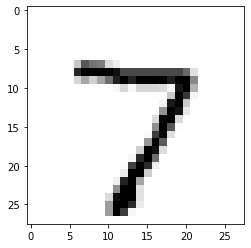

In [127]:
image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
plt.imshow(image_array, cmap='Greys', interpolation= 'None')

In [128]:
n.query((numpy.asfarray(all_values[1:])/ 255.0 * 0.99) + 0.01)

array([[0.01832627],
       [0.00491104],
       [0.01369272],
       [0.00487896],
       [0.00503701],
       [0.01195954],
       [0.00187938],
       [0.99150695],
       [0.0021698 ],
       [0.00368542]])

In [129]:
scorecard = []


for record in test_data_list:
  all_values = record.split(',')
  correct_label = int(all_values[0])
  #print(correct_label, "correct_label")
  inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
  outputs = n.query(inputs)
  label = numpy.argmax(outputs)
  #print(label, "network's answer")
  if (label == correct_label):
    scorecard.append(1)
  else:
    scorecard.append(0)
    pass
  pass


In [130]:
scorecard_array = numpy.asarray(scorecard)
print("performance = ",  scorecard_array.sum()/scorecard_array.size )


performance =  0.974


In [131]:
# helper to load data from PNG image files
import imageio
# glob helps select multiple files using patterns
import glob
# our own image test data set
our_own_dataset = []
for image_file_name in glob.glob('/content/drive/MyDrive/makeyourownneuralnetwork-master/mnist_dataset/2828_my_own_?.png'):
    print ("loading ... ", image_file_name)
    # use the filename to set the correct label
    label = int(image_file_name[-5:-4])
    # load image data from png files into an array
    img_array = imageio.imread(image_file_name, as_gray=True)
    # reshape from 28x28 to list of 784 values, invert values
    img_data  = 255.0 - img_array.reshape(784)
    # then scale data to range from 0.01 to 1.0
    img_data = (img_data / 255.0 * 0.99) + 0.01
    print(numpy.min(img_data))
    print(numpy.max(img_data))
    # append label and image data  to test data set
    record = numpy.append(label,img_data)
    #print(record)
    our_own_dataset.append(record)
    pass

loading ...  /content/drive/MyDrive/makeyourownneuralnetwork-master/mnist_dataset/2828_my_own_6.png
0.01
1.0
loading ...  /content/drive/MyDrive/makeyourownneuralnetwork-master/mnist_dataset/2828_my_own_9.png
0.01
1.0
loading ...  /content/drive/MyDrive/makeyourownneuralnetwork-master/mnist_dataset/2828_my_own_8.png
0.01
0.7864706
loading ...  /content/drive/MyDrive/makeyourownneuralnetwork-master/mnist_dataset/2828_my_own_3.png
0.01
1.0
loading ...  /content/drive/MyDrive/makeyourownneuralnetwork-master/mnist_dataset/2828_my_own_5.png
0.01
0.86800003
loading ...  /content/drive/MyDrive/makeyourownneuralnetwork-master/mnist_dataset/2828_my_own_7.png
0.01
0.7787059
loading ...  /content/drive/MyDrive/makeyourownneuralnetwork-master/mnist_dataset/2828_my_own_4.png
0.01
0.93011767
loading ...  /content/drive/MyDrive/makeyourownneuralnetwork-master/mnist_dataset/2828_my_own_2.png
0.01
1.0


[[0.00642868]
 [0.01635497]
 [0.00096942]
 [0.01221619]
 [0.00529255]
 [0.0730213 ]
 [0.48316179]
 [0.00647192]
 [0.00637659]
 [0.00295258]]
network says  6
match!


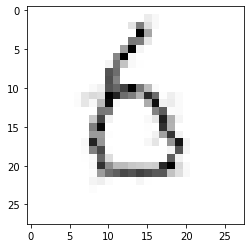

In [141]:
# test the neural network with our own images

# record to test
item = 0

# plot image
plt.imshow(our_own_dataset[item][1:].reshape(28,28), cmap='Greys', interpolation='None')

# correct answer is first value
correct_label = our_own_dataset[item][0]
# data is remaining values
inputs = our_own_dataset[item][1:]

# query the network
outputs = n.query(inputs)
print (outputs)

# the index of the highest value corresponds to the label
label = numpy.argmax(outputs)
print("network says ", label)
# append correct or incorrect to list
if (label == correct_label):
  print ("match!")
else:
  print ("no match!")
  pass